In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
#CSV file into pandas dataframe

data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

#  Exploratory Data Analysis

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Deleting the customer id, gender and age**

In [8]:
data = data.drop(['CustomerID', 'Gender', 'Age'], axis=1)

In [9]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [10]:
data.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


**Choosing the Numbers of Clusters**

WCSS -> Within Clusters Sum of Squares

In [11]:
# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

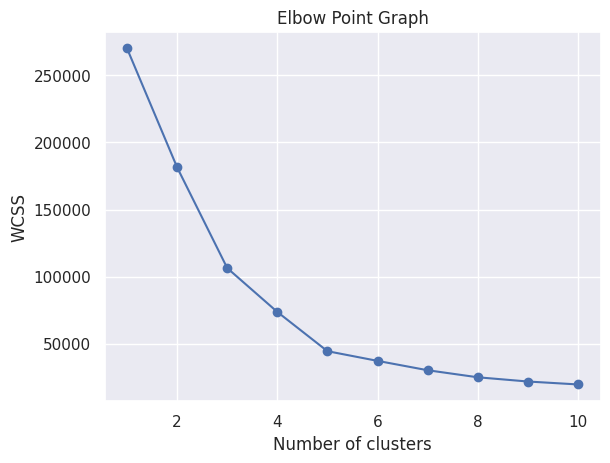

In [12]:
# Plotting the Elbow Method graph
sns.set()
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Finding the optimal numbers of clusters**

In [13]:
# Calculate the first derivative of WCSS
first_derivative = np.diff(wcss)

# Calculate the second derivative of WCSS
second_derivative = np.diff(first_derivative)

# Find the index of the maximum second derivative
elbow_point = np.argmax(second_derivative) + 1  # Adding 1 because index starts at 0

print(f"The optimal number of clusters based on the Elbow Method is: {elbow_point}")

The optimal number of clusters based on the Elbow Method is: 2


# Training the K-Means Clustering Model

In [14]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)

#return a label for each data point based on their cluster
y = kmeans.fit_predict(data)

print(y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


**Visulalizing all the clusters**

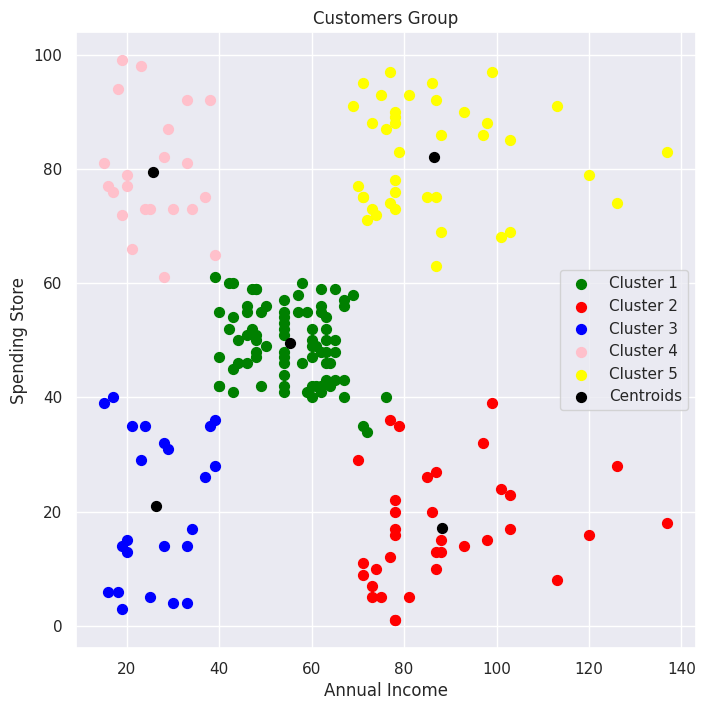

In [15]:
dataa = data.values
# Plotting the clusters and their centroids
plt.figure(figsize=(8, 8))
plt.scatter(dataa[y == 0, 0], dataa[y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(dataa[y == 1, 0], dataa[y == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(dataa[y == 2, 0], dataa[y == 2, 1], s=50, c='blue', label='Cluster 3')
plt.scatter(dataa[y == 3, 0], dataa[y == 3, 1], s=50, c='pink', label='Cluster 4')
plt.scatter(dataa[y == 4, 0], dataa[y == 4, 1], s=50, c='yellow', label='Cluster 5')


centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=50, c='black', label='Centroids')

plt.title('Customers Group')
plt.xlabel('Annual Income')
plt.ylabel('Spending Store')
plt.legend()
plt.show()